***
# Homework 2

**Course:** MATH 616 - Data-Driven Dynamical Systems, Stochastic Modeling and Prediction

**Name:** Shrivats Sudhir

**NetID:** ssudhir2

**Email:** ssudhir2@wisc.edu

***

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Question 1.

**Assume $x_t$ satisfies the SDE:**
$$d x_t = a_t\;dt + b_t\;dW_t,$$

## (a.)

**Derive the SDE of $f(x_t)$ when $f(x_t)=\frac{1}{2}x^2_t$**

Computing the first derivative:
$$ f'(x_t) = \frac{d}{dx_t}\bigg(\frac{1}{2}x_t^2\bigg) = \frac{1}{2} \cdot 2 \cdot x_t = x_t$$

Computing the second derivative:
$$f''(x_t) = \frac{d}{dx}(x_t) = 1$$

Now, applying the second order taylor expansion, we have that:
\begin{equation*}
    \begin{split}
    d\,f(x_t) &= \frac{1}{1!} \cdot \frac{\partial f}{\partial x_t} dx_t + \frac{1}{2!} \cdot \frac{\partial^2 f}{\partial x_t^2} (dx_t)^2\\
              &= f'(x_t)\,dx_t + \frac{1}{2} f''(x_t)\,(dx_t)^2\\
              &= x_t\,dx_t + \frac{1}{2}\,d(x_t)^2\\
              &= x_t \,(a_t\;dt + b_t\;dW_t) + \frac{1}{2}\,(a_t\;dt + b_t\;dW_t)^2
    \end{split}
\end{equation*}

Now, in order to simplify the second term:
\begin{equation*}
    \begin{split}
    (a_t\;dt + b_t\;dW_t)^2 &= a^2_t\;\underbrace{dt^2}_{=0} + b^2_t\;\underbrace{dW^2_t}_{=dt} + 2a_t\,b_t\underbrace{\,dt\,dW_t}_{=0}\\
    &= b^2_t\;dt
    \end{split}
\end{equation*}

This gives us that:
\begin{equation*}
    \begin{split}
    d\,f(x_t) &= x_t \,(a_t\;dt + b_t\;dW_t) + \frac{1}{2}\,b_t^2\;dt\\
    &= \bigg(x_ta_t + \frac{1}{2}b^2_t\bigg)\;dt + x_tb_t\;dW_t
    \end{split}
\end{equation*}

as required.

## (b.)

**Derive the SDE of $f(W_t)$ when $f(W_t)=W^4_t$**

Computing the first derivative:
$$ f'(W_t) = \frac{d}{dW_t}\bigg(W_t^4\bigg) = 4W_t^3$$

Computing the second derivative:
$$f''(W_t) = \frac{d}{dW_t}(4W_t^3) = 12W_t^2$$

Now, applying the second order taylor expansion, we have that:
\begin{equation*}
    \begin{split}
    d\,f(W_t) &= \frac{1}{1!} \cdot \frac{\partial f}{\partial W_t} dW_t + \frac{1}{2!} \cdot \frac{\partial^2 f}{\partial W_t^2} (dW_t)^2\\
              &= f'(W_t)\,dW_t + \frac{1}{2} f''(W_t)\,dW_t^2\\
              &= 4W_t^3\,dW_t + \frac{1}{2}\,12W_t^2\,\underbrace{dW_t^2}_{=dt}\\
              &= 4W_t^3\,dW_t + 6W_t^2\,dt\\
    \end{split}
\end{equation*}

as required.

# Question 2.

**Consider a two-state Markov chain with state space $S=\{1,2\}$ and transition probabilities $p=0.125$ and $q=0.25$. Numerically generate a long time series, using which to compute the expectation, the probability at each state, and the $n$-step transition probability matrix for $n=10$ and $n=100$. Compare your numerical results with the theoretical solutions.**

Given state space $S=\{1, 2\}$ with transition probabiltiies $p=0.125$ and $q=0.25$, we have the following transition matrix:
$$P = \begin{bmatrix} 1-p & p\\ q & 1-q \end{bmatrix} = \begin{bmatrix} 0.875 & 0.125\\ 0.25 & 0.75 \end{bmatrix}$$

![State Space and Associated Probabilities](https://raw.githubusercontent.com/Stochastic1017/MATH_616/refs/heads/main/Homeworks/Homework_2/state_space.png)

Let initial distribution $\alpha = [0.5, 0.5]$,  i.e., there is a 50-50 chance that initial state is $1$ or $2$.

Now, let $n$ be the number of steps taken in this random walk. We know that, for $n \to \infty$, the stationary distribution is defined as follows:
$$ \pi = \pi P $$
where $\pi$ is a row vector of probabilities that add up to 1.

Solving for $\pi$, we have that:
\begin{equation*}
    \begin{split}
        \begin{bmatrix} \pi_1 & \pi_2 \end{bmatrix} &= \begin{bmatrix} \pi_1 & \pi_2 \end{bmatrix} \cdot  \begin{bmatrix} 0.875 & 0.125\\ 0.25 & 0.75 \end{bmatrix}\\
        \begin{bmatrix} \pi_1 & \pi_2 \end{bmatrix} &= \begin{bmatrix} \pi_1 \cdot 0.875 + \pi_2 \cdot 0.25 & \pi_1 \cdot 0.125 + \pi_2 \cdot 0.75 \end{bmatrix}\\
    \end{split}
\end{equation*}

From above, we have the following system of equations:
$$ \pi_1 = \pi_1 \cdot 0.875 + \pi_2 \cdot 0.25, \quad \pi_2 = \pi_1 \cdot 0.125 + \pi_2 \cdot 0.75 $$

From which, we can gather that: $\pi_1 = 2 \cdot \pi_2$. Now, as we know $\pi_1 + \pi_2 = 1$, we conclude that:
$$ \pi_1 = 0.\bar{66}, \pi_2 = 0.\bar{33}$$ 

Using above, we have that, the expectation (or mean) of the state $S$ will be:
$$ \mathbb{E}[S] = 1 \cdot 0.\bar{66} + 2 \cdot 0.\bar{33} \approx 1.\bar{33}$$

Similarly, we also have the theoretical long-run n-step transition matrix:
$$ \lim_{n \to \infty} P^{(n)} = \begin{bmatrix} \pi_1 & \pi_2\\ \pi_1 & \pi_2 \end{bmatrix} = \begin{bmatrix} 2/3 & 1/3\\ 2/3 & 1/3 \end{bmatrix}$$ 

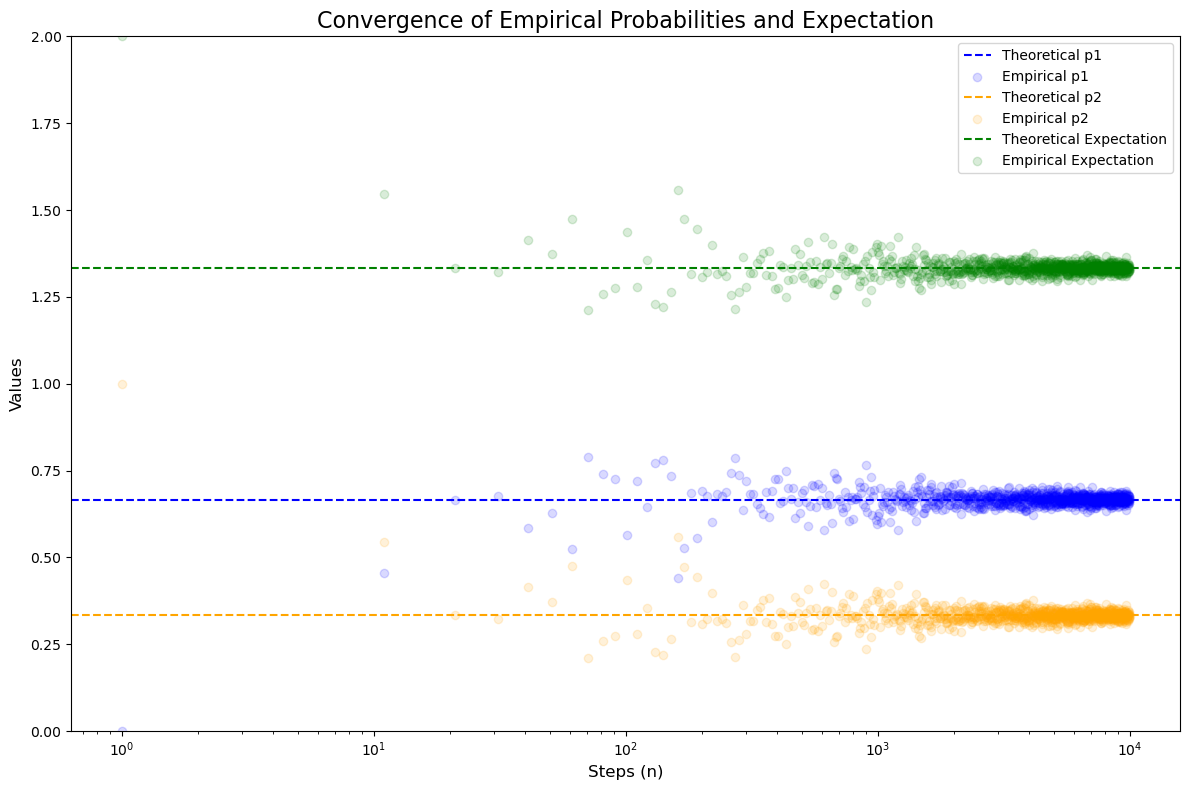

In [2]:
def random_walk(states, trans, alpha, n):

    """
    Simulate a random walk on a Markov chain.

    --- inputs ---
    - states (array-like): Array of states the Markov chain can be in.
    - trans (2D array): Transition matrix where each row represents the transition probabilities from a state.
    - alpha (array-like): Initial distribution over the states.
    - n (int): Number of steps for the random walk.

    --- outputs ---
    - path (1D array): The sequence of states visited during the random walk.
    """
    
    path = np.zeros(n, dtype=int)  # Initialize array to store the states visited during the walk
    path[0] = np.random.choice(states, p=alpha)  # Start the walk with an initial state based on distribution alpha
    
    for i in range(1, n):
        current_state = int(path[i-1]) - 1  # Get the current state (adjusted for zero-indexing)
        path[i] = np.random.choice(states, p=trans[current_state, :])  # Transition to the next state based on the transition matrix
    
    return path

def n_step_transition_matrix(trans, n):
    
    """
    Compute the n-step transition matrix for a Markov chain.
    
    --- inputs ---
    - trans (2D array): Transition matrix.
    - n (int): Number of steps.
    
    --- outputs ---
    - n_step_trans (2D array): The n-step transition matrix.
    """

    return np.linalg.matrix_power(trans, n)

# Define states and transition probabilities
states = np.array([1, 2])
trans = np.array([[0.875, 0.125], 
                  [0.25, 0.75]])

# Theoretical probabilities and expectations
theoretical_p1 = 2/3
theoretical_p2 = 1/3
theoretical_expectation = 1 * theoretical_p1 + 2 * theoretical_p2
theoretical_transition = np.array([[theoretical_p1, theoretical_p2], 
                                   [theoretical_p1, theoretical_p2]])

# Simulate random walk for various n (number of steps)
n = range(1, 10000, 10)      # Range of steps to evaluate
empirical_p1 = []            # To store empirical probabilities for state 1
empirical_p2 = []            # To store empirical probabilities for state 2
empirical_expectation = []   # To store empirical expectations

for i in n:
    path = random_walk(states, trans, alpha=[0.5, 0.5], n=i)  # Perform random walk for i steps
    empirical_p1.append(np.mean(path == 1))                   # Empirical probability of being in state 1
    empirical_p2.append(np.mean(path == 2))                   # Empirical probability of being in state 2
    empirical_expectation.append(np.mean(path))               # Empirical expectation

# Plot the results
fig, ax = plt.subplots(figsize=(12, 8))

# Plot theoretical and empirical values for p1 (probability of being in state 1)
ax.axhline(theoretical_p1, color='blue', linestyle='--', label='Theoretical p1')
ax.scatter(n, empirical_p1, label='Empirical p1', color='blue', alpha=0.15)

# Plot theoretical and empirical values for p2 (probability of being in state 2)
ax.axhline(theoretical_p2, color='orange', linestyle='--', label='Theoretical p2')
ax.scatter(n, empirical_p2, label='Empirical p2', color='orange', alpha=0.15)

# Plot theoretical and empirical values for the expectation
ax.axhline(theoretical_expectation, color='green', linestyle='--', label='Theoretical Expectation')
ax.scatter(n, empirical_expectation, label='Empirical Expectation', color='green', alpha=0.15)

# Customize the plot
ax.set_xscale('log')  # Use log scale for the x-axis to highlight convergence over many steps
ax.set_title('Convergence of Empirical Probabilities and Expectation', fontsize=16)
ax.set_xlabel('Steps (n)', fontsize=12)
ax.set_ylabel('Values', fontsize=12)
ax.set_ylim(0, 2)
ax.legend()

plt.tight_layout()  # Adjust layout for better readability
plt.show()

In [3]:
# Simulate a random walk with 10 steps
path_10 = random_walk(states, trans, alpha=[0.5, 0.5], n=10)

# Compute the 10-step transition matrix
ten_step_trans = n_step_transition_matrix(trans, n=10)

# Create a DataFrame to compare empirical and theoretical metrics for n=10
df_10 = pd.DataFrame({
    'Metric': ['p1', 'p2', 'Expectation'],
    'Empirical': [np.mean(path_10 == 1), np.mean(path_10 == 2), np.mean(path_10)],  # Empirical probabilities and expectation
    'Theoretical': [theoretical_p1, theoretical_p2, theoretical_expectation],       # Theoretical probabilities and expectation
    'Absolute Difference': [
        np.abs(np.mean(path_10 == 1) - theoretical_p1),      # Absolute difference between empirical and theoretical p1
        np.abs(np.mean(path_10 == 2) - theoretical_p2),      # Absolute difference between empirical and theoretical p2
        np.abs(np.mean(path_10) - theoretical_expectation)   # Absolute difference between empirical and theoretical expectation
    ]
})

# Print comparison of empirical vs theoretical probabilities and expectations for n=10
print("Theoretical vs Empirical probabilities and expectations (n=10):\n")
print(df_10)
print('\n')

# Compute and print the difference between the long-run transition matrix and the 10-step transition matrix
print("Difference between long-run transition matrix and 10-step transition matrix:\n")
print(f"{theoretical_transition - ten_step_trans}")

Theoretical vs Empirical probabilities and expectations (n=10):

        Metric  Empirical  Theoretical  Absolute Difference
0           p1        1.0     0.666667             0.333333
1           p2        0.0     0.333333             0.333333
2  Expectation        1.0     1.333333             0.333333


Difference between long-run transition matrix and 10-step transition matrix:

[[-0.00303165  0.00303165]
 [ 0.0060633  -0.0060633 ]]


In [4]:
# Simulate a random walk with 100 steps
path_100 = random_walk(states, trans, alpha=[0.5, 0.5], n=100)

# Compute the 100-step transition matrix
hundred_step_trans = n_step_transition_matrix(trans, n=100)

# Create a DataFrame to compare empirical and theoretical metrics for n=100
df_100 = pd.DataFrame({
    'Metric': ['p1', 'p2', 'Expectation'],
    'Empirical': [np.mean(path_100 == 1), np.mean(path_100 == 2), np.mean(path_100)],  # Empirical probabilities and expectation
    'Theoretical': [theoretical_p1, theoretical_p2, theoretical_expectation],          # Theoretical probabilities and expectation
    'Absolute Difference': [
        np.abs(np.mean(path_100 == 1) - theoretical_p1),     # Absolute difference for p1
        np.abs(np.mean(path_100 == 2) - theoretical_p2),     # Absolute difference for p2
        np.abs(np.mean(path_100) - theoretical_expectation)  # Absolute difference for expectation
    ]
})

# Print comparison of empirical vs theoretical probabilities and expectations for n=100
print("Theoretical vs Empirical probabilities and expectations (n=100):\n")
print(df_100)
print('\n')

# Compute and print the difference between the long-run transition matrix and the 100-step transition matrix
print("Difference between long-run transition matrix and 100-step transition matrix:\n")
print(f"{theoretical_transition - hundred_step_trans}")


Theoretical vs Empirical probabilities and expectations (n=100):

        Metric  Empirical  Theoretical  Absolute Difference
0           p1       0.65     0.666667             0.016667
1           p2       0.35     0.333333             0.016667
2  Expectation       1.35     1.333333             0.016667


Difference between long-run transition matrix and 100-step transition matrix:

[[1.11022302e-16 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]]


# Question 3.

**Use Monte Carlo simulations to compute the mean of a one-dimensional standard Gaussian distribution (with zero mean and variance being $1$). How many Monte Carlo sample points is needed if the standard error is less than $0.05$?**

We know that the formula for standard error ($SE$) is:
$$ SE = \frac{\sigma}{\sqrt{n}} $$

Therefore, in order to achieve standard error less than 0.05, i.e., $SE < 0.05$:
\begin{equation*}
    \begin{split}
        0.05 &> \frac{1}{\sqrt{n}}\\
        0.05 \cdot \sqrt{n}  &> 1\\
        (0.05 \cdot \sqrt{n})^2 &> 1^2\\
        0.0025n &> 1\\
        n &> 400
    \end{split}
\end{equation*}

Thus, we conclude that we need a sample of **at least 400** to achieve a standard error less than $0.05$.

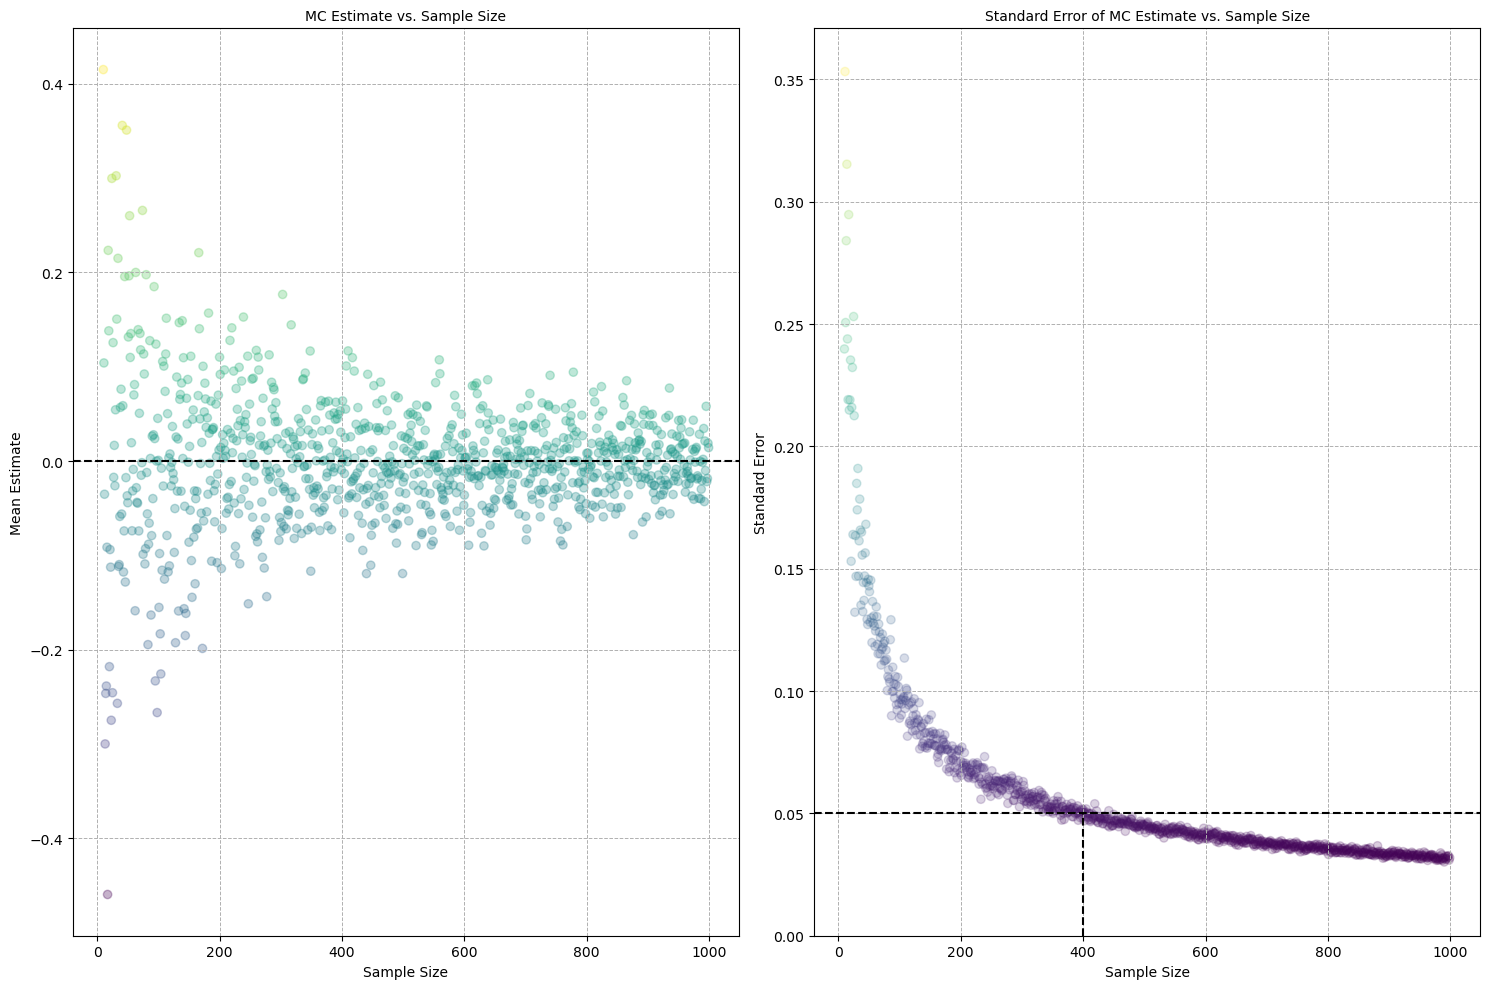

In [5]:
def monte_carlo_mean_and_se(num_points, mean, var):
    
    """
    Perform Monte Carlo simulations to estimate the mean of a Gaussian distribution.

    --- inputs ---
    - num_points (int): Number of points/samples to draw.
    - mean (float): The true mean of the Gaussian distribution.
    - var (float): The variance of the Gaussian distribution.

    --- outputs ---
    - mean_estimate (float): The estimated mean of the samples.
    - standard_error (float): The standard error of the mean estimate.
    """

    # Draw samples from a Gaussian distribution
    samples = np.random.normal(mean, np.sqrt(var), num_points)
    
    # Estimate the mean and compute standard error
    mean_estimate = np.mean(samples)
    standard_error = np.std(samples) / np.sqrt(num_points)
    
    return mean_estimate, standard_error

# Lists to store results for different sample sizes
mean_estimates = []             # Store mean estimates from Monte Carlo simulations
standard_errors = []            # Store standard errors for each estimate
sample_sizes = range(10, 1000)  # Range of sample sizes to test

# Monte Carlo simulations for different sample sizes
for sample_size in sample_sizes:
    mean_estimate, standard_error = monte_carlo_mean_and_se(sample_size, 
                                                            mean=0, 
                                                            var=1)
    mean_estimates.append(mean_estimate)
    standard_errors.append(standard_error)

# Create subplots for visualization
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))

# Normalize and color the scatter plot based on mean estimates
norm = plt.Normalize(min(mean_estimates), max(mean_estimates))
colors = plt.cm.viridis(norm(mean_estimates))

# Scatter plot: Mean estimate vs. sample size
sc = ax0.scatter(sample_sizes, 
                 mean_estimates, 
                 c=mean_estimates, 
                 cmap='viridis', 
                 marker="o", 
                 alpha=0.3)

ax0.axhline(y=0, color="black", linestyle="--")  # Theoretical mean (0)
ax0.set_title("MC Estimate vs. Sample Size", fontsize=10)
ax0.set_xlabel("Sample Size", fontsize=10)
ax0.set_ylabel("Mean Estimate", fontsize=10)
ax0.grid(True, which='both', linestyle='--', linewidth=0.7)

# Normalize and color the scatter plot based on standard errors
norm = plt.Normalize(min(standard_errors), max(standard_errors))
colors = plt.cm.viridis(norm(standard_errors))

# Scatter plot: Standard error vs. sample size
sc = ax1.scatter(sample_sizes, 
                 standard_errors, 
                 c=standard_errors, 
                 cmap='viridis', 
                 marker="o", 
                 alpha=0.2)

ax1.axhline(y=0.05, color="black", linestyle="--")              # Standard error threshold
ax1.plot([400, 400], [0, 0.05], color="black", linestyle="--")  # Reference line for 400 samples
ax1.set_title("Standard Error of MC Estimate vs. Sample Size", fontsize=10)
ax1.set_xlabel("Sample Size", fontsize=10)
ax1.set_ylabel("Standard Error", fontsize=10)
ax1.grid(True, which='both', linestyle='--', linewidth=0.7)
ax1.set_ylim(bottom=0)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Question 4.

**Please use Monte Carlo simulation to compute $\sqrt{2}$. Show the standard error as a function of number of samples.**

The Monte Carlo Simuilation algorithm to compute square root of any non-negative number $n$ is as follows:

First, we fix `num_samples` that decides how many times to run the sampling. The larger the number, the more accurate our estimate. Then, our algorithm is as follows:

1. Initialize `points_inside=0`.

2. Randomly sample from uniform distribution between 0, $n$.

3. If random sample squared <= 2, then add one to `points_inside`. Else, resample and repeat 3.

4. After the samples are exhausted, we take the proportion `points_inside/num_samples` and multiply it with our desired square root integer $n$.

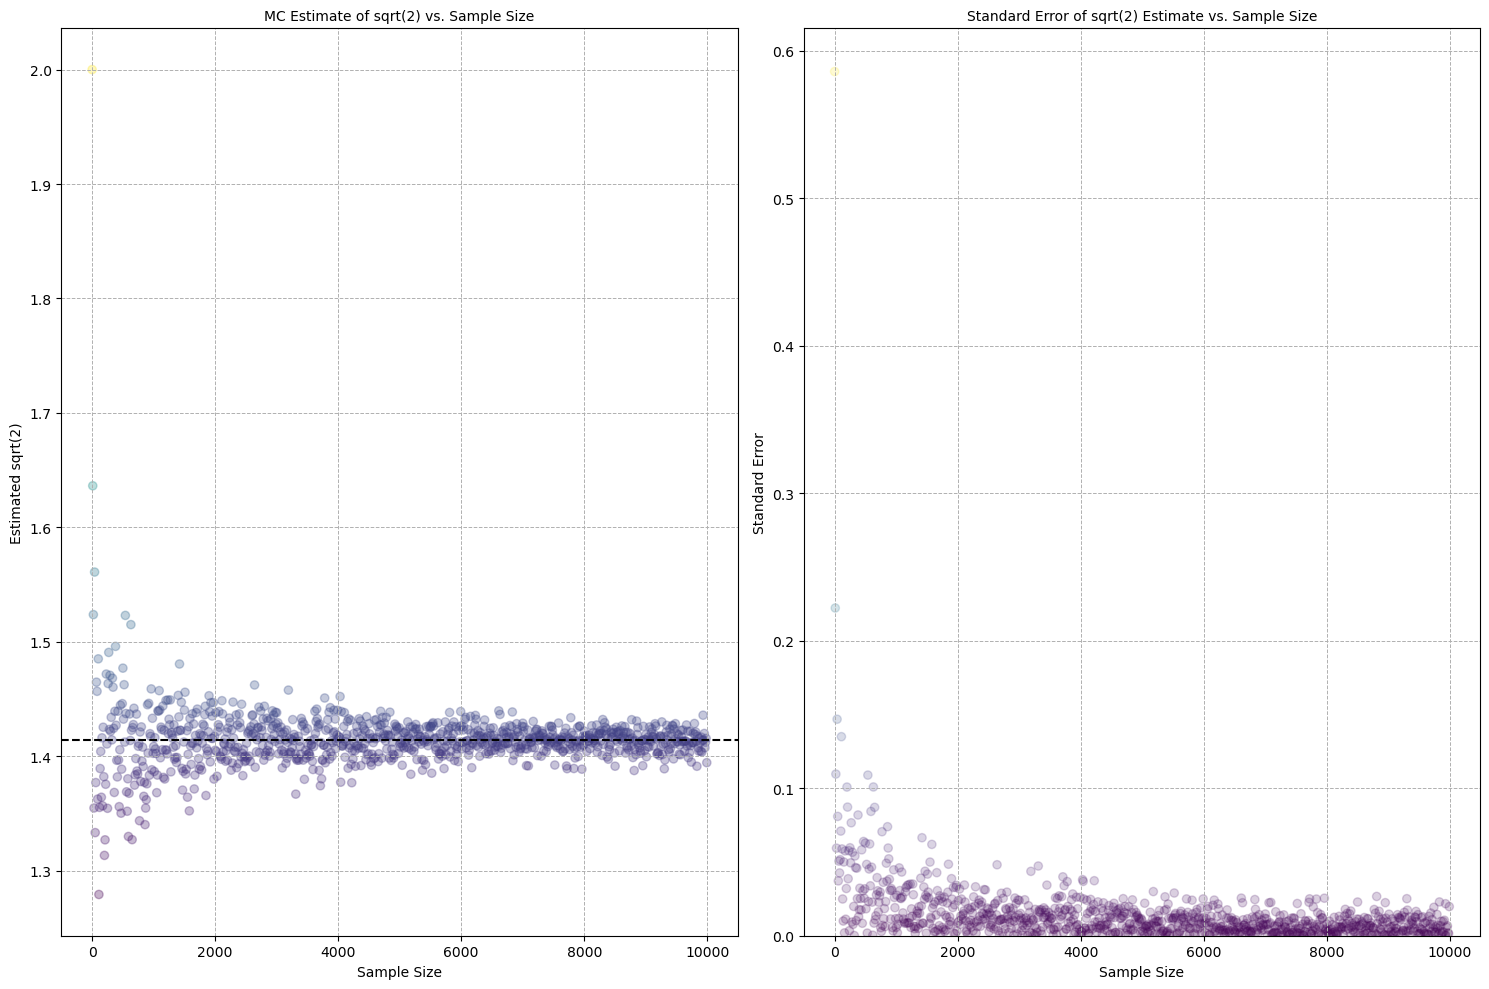

In [6]:
def monte_carlo_sqrt(n, num_samples):

    """
    Estimate the square root of a number using Monte Carlo simulation.
    
    --- inputs ---
    - n (float or int): The number for which to estimate the square root.
    - num_samples (int): Number of random samples to use for the estimate.
    
    --- outputs ---
    - estimate (float): The estimated square root value.
    - standard_error (float): The standard error of the estimate.
    """

    points_inside = 0
    
    # Monte Carlo sampling: Count points where random value's square is <= n
    for _ in range(num_samples):
        if np.random.uniform(0, n)**2 <= n:
            points_inside += 1
            
    estimate = n * (points_inside / num_samples)   # Estimate of sqrt(n) based on proportion of points
    standard_error = np.abs(np.sqrt(n) - estimate) # Compute standard error based on the estimate
    
    return estimate, standard_error

# Lists to store results for different sample sizes
sqrt_estimates = []                 # Store square root estimates from Monte Carlo simulations
standard_errors = []                # Store standard errors for each estimate
sample_sizes = range(1, 10000, 10)  # Range of sample sizes to test

# Perform Monte Carlo simulations for square root of 2
for sample_size in sample_sizes:
    estimate, standard_error = monte_carlo_sqrt(n=2, num_samples=sample_size)
    sqrt_estimates.append(estimate)
    standard_errors.append(standard_error)

# Create subplots for visualization
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))

# Normalize and color the scatter plot based on sqrt estimates
norm = plt.Normalize(min(sqrt_estimates), max(sqrt_estimates))
colors = plt.cm.viridis(norm(sqrt_estimates))

# Scatter plot: Square root estimate vs. sample size
sc = ax0.scatter(sample_sizes, 
                 sqrt_estimates, 
                 c=sqrt_estimates, 
                 cmap='viridis', 
                 marker="o", 
                 alpha=0.3)

ax0.axhline(y=np.sqrt(2), color="black", linestyle="--", label='Theoretical sqrt(2)')
ax0.set_title("MC Estimate of sqrt(2) vs. Sample Size", fontsize=10)
ax0.set_xlabel("Sample Size", fontsize=10)
ax0.set_ylabel("Estimated sqrt(2)", fontsize=10)
ax0.grid(True, which='both', linestyle='--', linewidth=0.7)

# Normalize and color the scatter plot based on standard errors
norm = plt.Normalize(min(standard_errors), max(standard_errors))
colors = plt.cm.viridis(norm(standard_errors))

# Scatter plot: Standard error vs. sample size
sc = ax1.scatter(sample_sizes, 
                 standard_errors, 
                 c=standard_errors, 
                 cmap='viridis', 
                 marker="o", 
                 alpha=0.2)

ax1.set_title("Standard Error of sqrt(2) Estimate vs. Sample Size", fontsize=10)
ax1.set_xlabel("Sample Size", fontsize=10)
ax1.set_ylabel("Standard Error", fontsize=10)
ax1.grid(True, which='both', linestyle='--', linewidth=0.7)
ax1.set_ylim(bottom=0)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

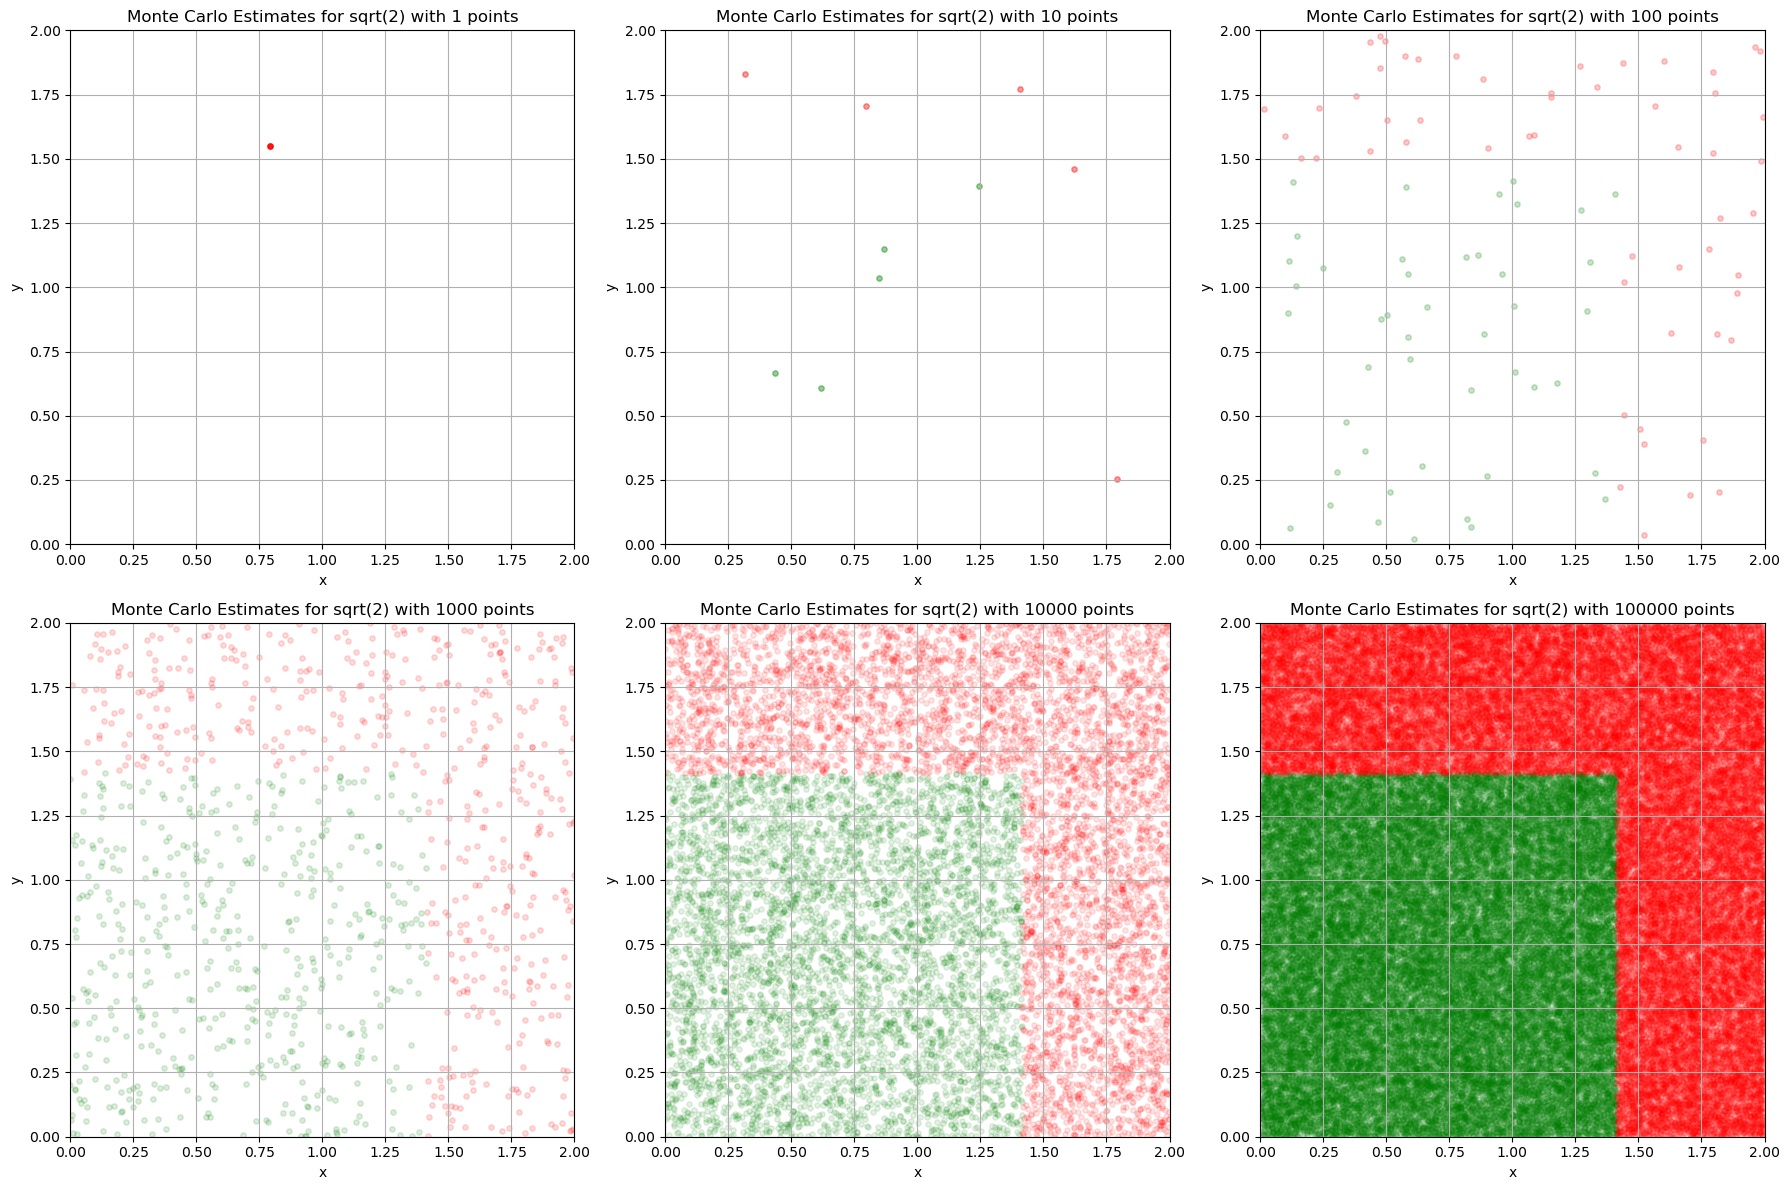

In [7]:
def plot_monte_carlo_sqrt_subplot(n, sample_sizes):

    """
    Create a 2x3 subplot to visualize the Monte Carlo simulation for estimating
    the square root of a number using different sample sizes.
    
    --- inputs ---
    - n (int or float): The number for which to estimate the square root.
    - sample_sizes (list): List of sample sizes to run the simulation.
    
    --- outputs ---
    - fig, axs: Matplotlib figure and axes containing the subplots.
    """
    
    fig, axs = plt.subplots(2, 3, figsize=(18, 12))  # Create a 2x3 grid of subplots
    
    for i, num_points in enumerate(sample_sizes):
        upper = n               # Set the upper bound for random point generation
        points_inside = []      # List to hold points inside the sqrt boundary
        points_outside = []     # List to hold points outside the sqrt boundary

        # Generate points and classify them as inside or outside
        for _ in range(num_points):
            x = np.random.uniform(0, upper)  # Random x between 0 and upper
            y = np.random.uniform(0, upper)  # Random y between 0 and upper
        
            # Check if both x and y are within the square root boundary
            if (x**2 <= n) and (y**2 <= n):
                points_inside.append((x, y))
            else:
                points_outside.append((x, y))
    
        # Convert lists to numpy arrays for easier plotting
        points_inside = np.array(points_inside)
        points_outside = np.array(points_outside)

        # Dynamically adjust alpha (transparency) based on the number of points
        alpha_value = min(1.0, 1 / np.log(num_points + 2))
        
        # Determine which subplot to use
        ax = axs[i // 3, i % 3]
        
        # Scatter plot for points inside the sqrt boundary (green)
        if len(points_inside) > 0:
            ax.scatter(points_inside[:, 0], 
                       points_inside[:, 1], 
                       color='green',
                       alpha=alpha_value, 
                       s=15)
        
        # Scatter plot for points outside the sqrt boundary (red)
        if len(points_outside) > 0:
            ax.scatter(points_outside[:, 0], 
                       points_outside[:, 1], 
                       color='red',
                       alpha=alpha_value, 
                       s=15)

        # Set title and labels for the subplot
        ax.set_title(f"Monte Carlo Estimates for sqrt({n}) with {num_points} points")
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.grid(True)  # Enable grid for better visualization
        
        # Set plot limits for x and y axes
        ax.set_xlim(0, upper)
        ax.set_ylim(0, upper)
    
    plt.tight_layout()  # Adjust layout to prevent overlapping of subplots
    return fig, axs

# Define sample sizes to test
sample_sizes = [1, 10, 100, 1000, 10000, 100000]

# Generate the plot for sqrt(2) with the specified sample sizes
fig, axs = plot_monte_carlo_sqrt_subplot(2, sample_sizes)
plt.show()